In [2]:
from src.data.genSynthData import genSynthDataS1, genNoisySynthDataS1

In [3]:
# Importations 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as snb
import torch        
import random
# style stuff
snb.set(font_scale=1.5)
snb.set_style('darkgrid')
colors = ['r', 'g', 'b', 'y']

(array([ 4., 11., 14., 24., 21., 11.,  7.,  6.,  1.,  1.]),
 array([1.09212617, 1.33846956, 1.58481294, 1.83115633, 2.07749972,
        2.32384311, 2.5701865 , 2.81652988, 3.06287327, 3.30921666,
        3.55556005]),
 <BarContainer object of 10 artists>)

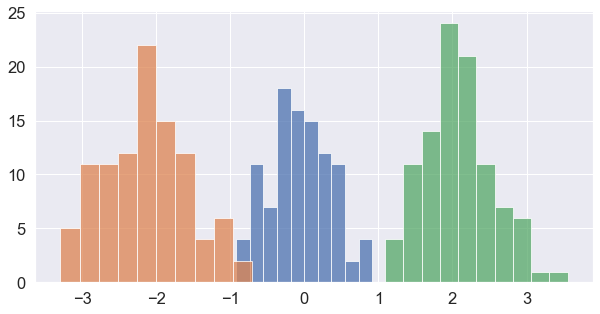

In [4]:
# Generate Spherical Data on S1 

# Draw theta from three gaussians
gr1 = np.random.normal(scale = 0.4, size = 100)
gr2 = np.random.normal(scale = 0.6, loc = -np.pi/1.5, size = 100)
gr3 = np.random.normal(scale= 0.5, loc = np.pi/1.5, size = 100)

plt.figure(figsize = (10,5))
plt.hist(gr1, alpha = 0.75)
plt.hist(gr2, alpha = 0.75)
plt.hist(gr3, alpha = 0.75)

(-1.1, 1.1)

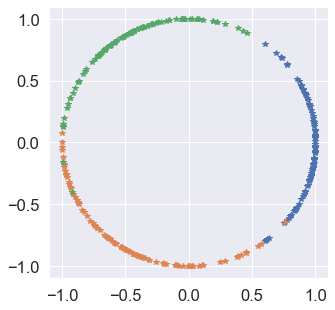

In [5]:
plt.figure(figsize = (5,5))
plt.plot(np.cos(gr1), np.sin(gr1), '*')
plt.plot(np.cos(gr2), np.sin(gr2), '*')
plt.plot(np.cos(gr3), np.sin(gr3), '*')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

In [6]:
# Seeting seed for reproducability
np.random.seed(60220)
Nclasses = 4
Nsamples = 50
np.random.seed(60220)

#Drawing means between -pi and pi
means = np.random.uniform(low = -np.pi, high = np.pi, size = Nclasses)
scales = np.random.uniform(low = 0.1, high = 1, size = Nclasses)

# Drawing angles from normal distribution 
thetas = [np.random.normal(loc = means[i], scale = scales[i], size = Nsamples) for i in range(Nclasses)]



(-1.1, 1.1)

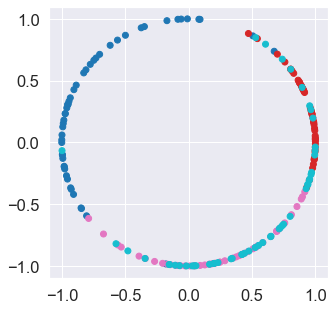

In [7]:
# Changing to polar coordinates 
samplesCartesian = [np.transpose(np.array([np.cos(thetas[i]), np.sin(thetas[i]),  np.ones(len(thetas[0]))*i])) for i in range(Nclasses)] # Size: samples, 2, Nclasses)
#np.transpose(np.array(samplesCartesian[1]))
samplesCartesian = np.concatenate(samplesCartesian)

coords = samplesCartesian[:,0:2]
target = samplesCartesian[:,2]

plt.figure(figsize = (5,5))
plt.scatter(x = samplesCartesian[:,0], y = samplesCartesian[:,1], c = samplesCartesian[:,2], cmap = "tab10")
plt.xlim((-1.1,1.1))
plt.ylim((-1.1,1.1))

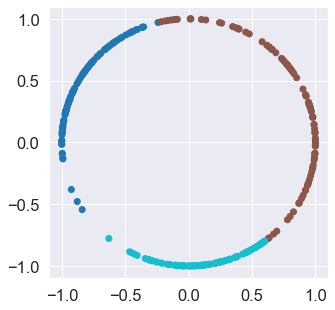

In [8]:
coords, target = genSynthDataS1(Nclasses = 3, Nsamples = 100, plotCartesian = True)

In [9]:
def genNoisySynthDataS1(Nsamples = 100, Nclasses = 3, plotCartesian = True, newDim= 20):
    # Getting synhetic S1 data 
    coords, target = genSynthDataS1(Nsamples, Nclasses, plotCartesian)

    # Multiplicative and additive random noise 
    noisyCoords = coords@np.random.normal(size = (np.shape(coords)[1],newDim)) + np.random.normal(size = (np.shape(coords)[0],newDim))

    return (noisyCoords, target)

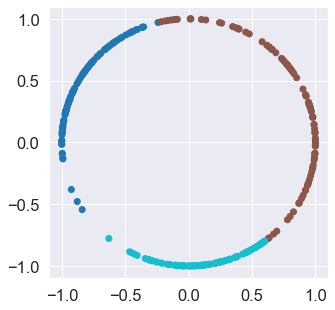

In [10]:
noisyDat, targets = genNoisySynthDataS1(newDim = 50)